<a href="https://colab.research.google.com/github/nafrielramadhan/naive-bayes/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan
##**Topic: Naive Bayes**

</center>

# Naive Bayes

## Hands On Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [ ]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [ ]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### Preprocessing

In [ ]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(caesarian)

Tidak ditemukan missing value pada dataset


In [ ]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data : " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data : 8


Terdapat 8 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [ ]:
caesarian_noduplicate = caesarian.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(caesarian_noduplicate.duplicated().sum()))

Jumlah duplikasi data : 0


<Axes: >

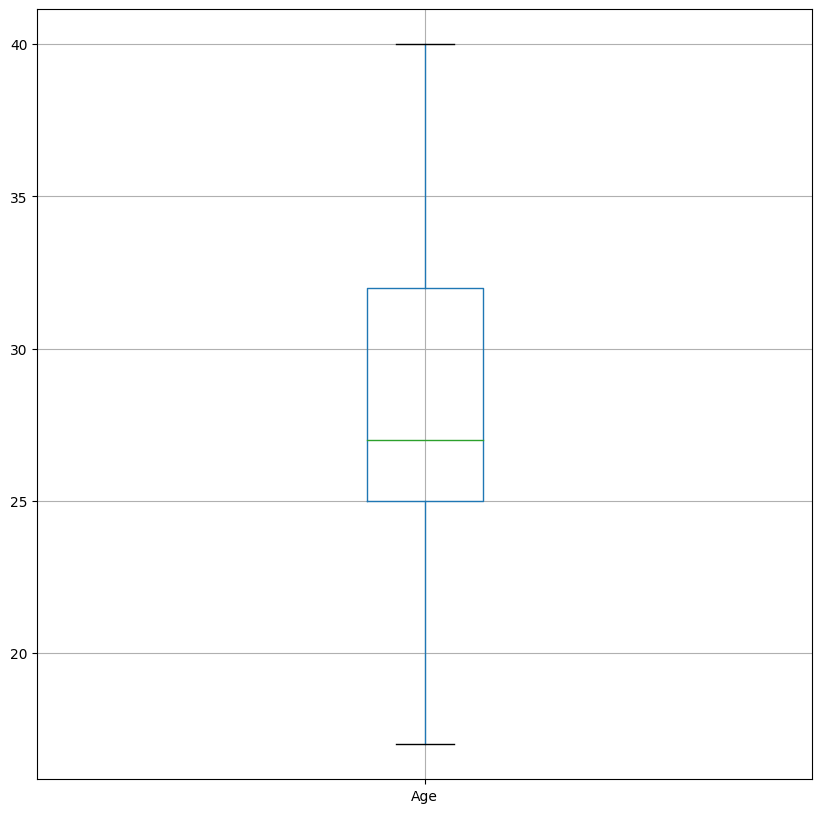

In [ ]:
# mengecek keberadaan outlier
caesarian_noduplicate.boxplot(figsize=(10,10))

Tidak tampak ada outlier pada *data*

In [ ]:
# mengembalikan data caesarian yang sudah clean ke variabel yang sebelumnya
caesarian = caesarian_noduplicate

### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* dsb.


Teknik-teknik, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait kelebihan dan kekurangan ketiga teknik tersebut). Pada sesi tutorial ini, kita akan menggunakan teknik one hot encoding. <br><br>
Referensi apa itu one-hot encoding : <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [ ]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian, drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,False,True,False,False,False,False
1,26,False,True,False,True,False,True
2,26,True,False,False,True,False,False
3,28,False,True,False,False,False,False
4,22,False,True,False,True,False,True


<b><i> Pemicu : </i></b><br>
Kenapa kita buang fitur pertama dari setiap kolom setelah kita melakukan one-hot encoding? Jika teman-teman baca kembali pada penjelasan naive bayes, naive bayes memegang asumsi yang kuat <b>bahwa</b> setiap fitur independen satu sama lain. Setelah kita melakukan transformasi one hot encoding, akan terjadi korelasi yang sangat tinggi pada dataset kita. Semisal, setelah kita encoding variable gender, terbentuk fitur <b>is_male</b> dan juga <b>is_female</b>. Kedua fitur ini akan saling berkorelasi satu sama lain dengan sangat kuat yang dapat membuat proses training untuk beberapa algoritma menjadi berantakan. N-1 fitur saja sudah cukup, karena sudah dapat menampung semua informasi yang ada.  

In [ ]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept
0,22,False,True,False,False,False
1,26,False,True,False,True,False
2,26,True,False,False,True,False
3,28,False,True,False,False,False
4,22,False,True,False,True,False


In [ ]:
# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Caesarian_Yes, dtype: bool

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [ ]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [ ]:
scores = cross_val_score(modelnb, x_train, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.5742424242424242


In [ ]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [ ]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([ True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True])

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [ ]:
# Array data test
np.array(y_test)

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True])

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       False       0.40      0.33      0.36         6
        True       0.60      0.67      0.63         9

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.52      0.53      0.52        15



Confusion Matrix



prediction,False,True
actual,,
False,2,4
True,3,6




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5333333333333333
F1 Macro Average: 0.4976076555023923
F1 Micro Average: 0.5333333333333333
Precision Macro Average: 0.5
Precision Micro Average: 0.5333333333333333
Recall Macro Average: 0.5
Recall Micro Average: 0.5333333333333333



Berdasarkan laporan di atas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak *balance* <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma Naive Bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# Latihan Soal

Setelah mempelajari apa itu Naive bayes beserta contoh penerapannya pada Scikit-learn, langsung saja kita latihan 😊

## A. Pertanyaan Teoritis (Soal Pertama) [20]

### A. Soal Teoritis 1 [10]

Pada tahap *hands on Naive Bayes* sebelumnya, terlihat bahwa hasil evaluasi model masih kurang baik:
1. Menurut teman-teman, algoritma naive bayes apa yang menghasilkan hasil evaluasi paling baik untuk kasus sebelumnya?
2. Elaborasikan alasan mengapa teman-teman memilih algoritma tersebut di antara keseluruhan algoritma naive bayes lainnya? Menurut teman-teman, karakteristik apa dari algoritma tersebut yang menyebabkan algoritma tersebut menghasilkan kinerja paling baik dibandingkan yang lainnya.

Menurut saya, algoritma naive bayes yang paling cocok untuk kasus tersebut adalah Categorical Naive Bayes, alasannya adalah sebagai berikut:

1. Sangat Cocok Untuk Data Kategorikal: Categorical Naive Bayes merupakan varian dari Naive Bayes yang optimal untuk data kategorik. Algoritma ini mengasumsikan bahwa setiap fitur, yang diambil dari dataset Anda, mengikuti distribusi kategori. Ini cocok dengan data yang ada pada example.csv, dimana mayoritas fitur bersifat kategorik semua (Delivery No, Blood of Pressure, Heart Problem, Caesarian), hanya fitur age saja yang bersifat numerik.

2. Pengelolaan Fitur Berbeda yang baik: Algoritma ini dapat menangani fitur-fitur dengan jumlah kategori yang berbeda-beda dengan efektif. Hal ini sangat penting karena dalam dataset nyata, setiap fitur kategorikal seringkali memiliki jumlah kategori yang berbeda. Sama halnya dengan data example.csv dimana variabel blood of pressure memiliki lebih dari 2 kategori yang berbeda.

Tetapi menurut saya, salah satu hal yang penting untuk untuk mengimplementasikan Categorical Naive Bayes pada kasus di atas adalah harus melakukan preprocessing yang bak juga.

**Referensi:**
1. https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E
2. https://scikit-learn.org/stable/modules/naive_bayes.html

### B. Soal Teoritis 2 [10]

 Menurut teman-teman, apa yang akan terjadi bila ada nilai atribut yang tidak muncul/terjadi pada setiap kelas yang ada? Apa dampaknya terhadap model Naive Bayes yang kita buat? Kemudian, jelaskan hal-hal apa saja yang dapat dilakukan untuk mengatasi masalah tersebut?

Hal ini dapat menyebabkan masalah yang dikenal sebagai "The Zero-Frequency Problem". Dalam Naive Bayes, probabilitas suatu kelas dihitung berdasarkan frekuensi atribut dalam kelas tersebut. Jika atribut tertentu tidak muncul sama sekali dalam sebuah kelas, probabilitasnya akan menjadi nol, dan ini akan mengakibatkan probabilitas keseluruhan menjadi nol, menyebabkan model gagal membuat prediksi yang akurat.

**Dampaknya terhadap model Naive Bayes:**

**1. Prediksi yang Tidak Akurat:** Jika probabilitas salah satu atribut adalah nol, hal ini dapat mengarah pada prediksi yang tidak akurat atau keliru karena mengabaikan informasi dari atribut lain.

**2. Overfitting:** Jika data training sangat tidak seimbang dan terdapat atribut dengan nilai yang jarang muncul, model Naive Bayes bisa cenderung overfitting pada kelas mayoritas dan mengabaikan kelas minoritas.

**3. Bias terhadap Kelas Lain:** Hal ini bisa menyebabkan model menjadi bias terhadap kelas lain di mana atribut ini muncul, bahkan jika kelas tersebut sebenarnya bukan prediksi yang paling tepat.

Untuk mengatasi masalah “The Zero-Frequency Problem” ini, ada beberapa metode yang dapat digunakan:

**1. Laplace Smoothing (Additive Smoothing):** Smoothing melibatkan penambahan nilai kecil (biasanya 1) ke semua perhitungan frekuensi. Ini memastikan bahwa tidak ada probabilitas yang menjadi nol, karena setiap atribut akan memiliki frekuensi minimal yang kecil.

**2. Menerapkan Varian Naive Bayes yang Berbeda:** Untuk data tertentu, menggunakan varian lain dari Naive Bayes yang lebih cocok mungkin mengurangi dampak masalah ini. Misalnya, Gaussian Naive Bayes mungkin tidak mengalami masalah ini untuk atribut numerik karena ia mengasumsikan distribusi normal daripada mengandalkan frekuensi murni.

**3. Pengaturan Fitur:** Dalam beberapa kasus, fitur yang menyebabkan masalah ini mungkin tidak relevan atau penting dan bisa dihilangkan. Namun, ini harus dilakukan dengan hati-hati untuk menghindari kehilangan informasi penting.

**4. Mengumpulkan Kategori:** Dalam kasus fitur kategorik dengan banyak kategori, menggabungkan beberapa kategori yang serupa atau jarang muncul menjadi satu kategori 'lainnya' bisa mengurangi masalah ini.
Data Resampling: Dalam kasus ketidakseimbangan kelas, resampling data untuk menyeimbangkan distribusi kelas juga bisa membantu.

Referensi: https://en.wikipedia.org/wiki/Additive_smoothing
https://www.atoti.io/articles/how-to-solve-the-zero-frequency-problem-in-naive-bayes/


## B. Latihan Implementasi [70]

Kita akan mencoba membuat model klasifikasi untuk kasus penyakit Stroke pada dataset `stroke.csv`, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini.

Attribute Information

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not <br/>
Sumber : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#mengubah data categoric
from sklearn.preprocessing import LabelEncoder

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2
from numpy import inf

In [ ]:
stroke = pd.read_csv("stroke.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print("Jumlah baris : ", stroke.shape[0])
print("Jumlah kolom : ", stroke.shape[1])

Jumlah baris :  5110
Jumlah kolom :  12


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# drop id karena tidak dibutuhkan
stroke = stroke.drop(["id"],axis=1)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **stroke**. Atribut tersebut terdiri atas 2 nilai unik, **0 dan 1**, yang menyatakan apakah seorang pasien mengidap penyakit stroke atau tidak. **1** berarti stroke, sedangkan **0** sebaliknya. Secara sederhana, model yang akan kita buat diharapkan dapat memprediksi dengan baik status stroke dari pasien.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Gas, kita lanjut!

### 1. Preprocessing [20]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan outlier` teman-teman bebas memilih penanganan outlier apa yang teman-teman gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, teman-teman bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Teman-teman boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib teman-teman lakukan adalah seperti diatas. Silahkan bereksplorasi :D

In [ ]:
# Mengecek nilai yang hilang
missing_values = stroke.isnull().sum()
missing_values


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

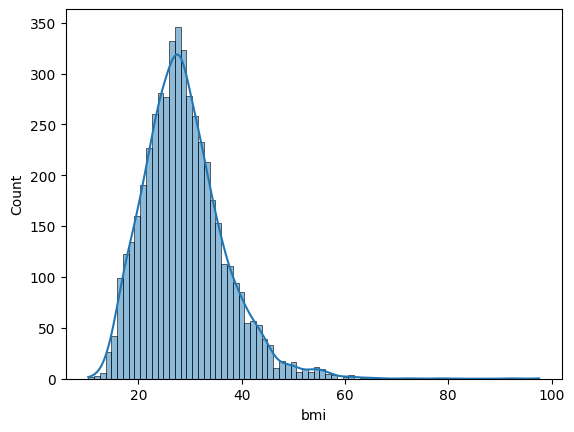

In [ ]:
# Menampilkan distribusi dari 'bmi'
sns.histplot(stroke['bmi'].dropna(), kde=True)
plt.show()

karena bmi berdistribusi tidak terlalu skewed (terlihat normal), maka kita handle missing value dengan mengisi nilainya dengan mean.

In [ ]:
# Mengisi nilai yang hilang di 'bmi' dengan rata-rata
mean_bmi = stroke['bmi'].mean()
stroke['bmi'].fillna(mean_bmi, inplace=True)

# Verifikasi apakah semua nilai yang hilang telah diisi
missing_values = stroke.isnull().sum()
missing_values


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
stroke.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [ ]:
print("Jumlah duplikasi data : " + str(stroke.duplicated().sum()))

Jumlah duplikasi data : 0


Tidak ada duplikasi data.

Tidak ada duplikasi data pada dataset ini.

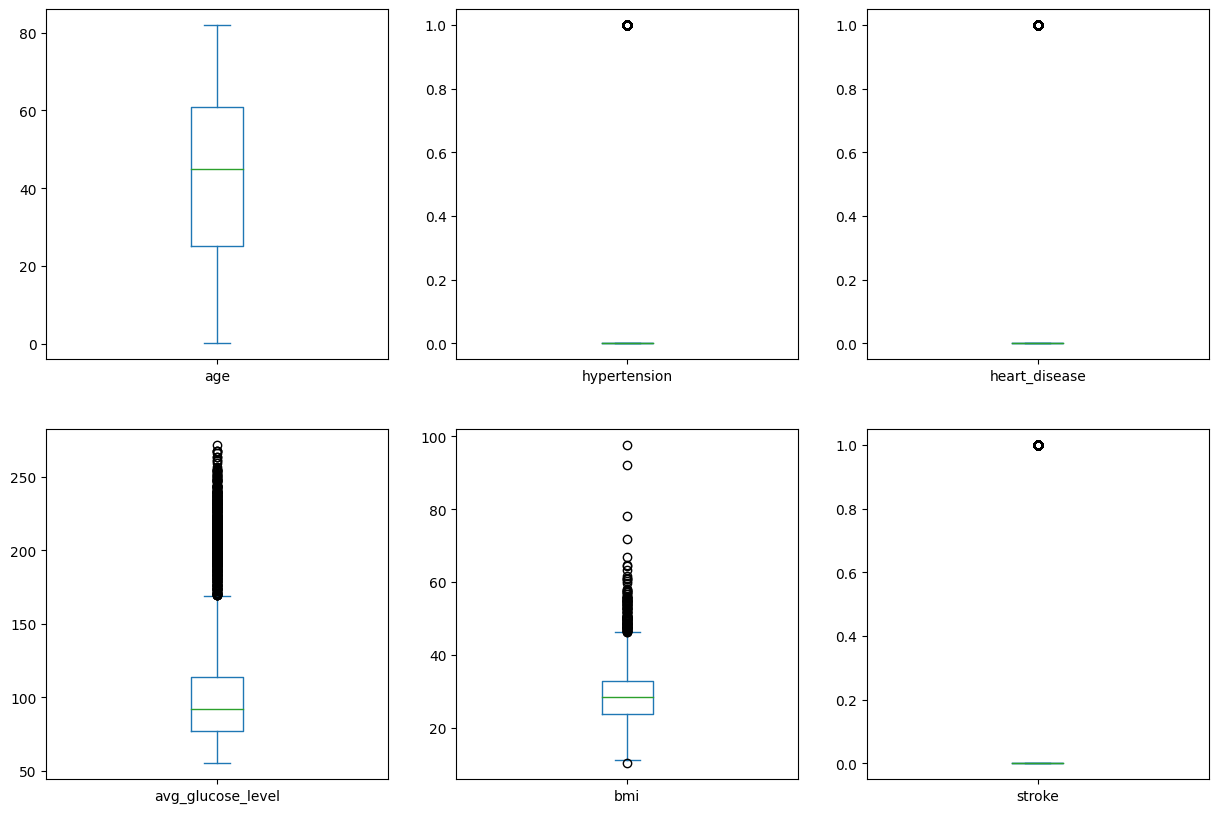

In [ ]:
# Membuat boxplot untuk setiap variabel numerik
numerical_cols = stroke.select_dtypes(include=[np.number]).columns
stroke[numerical_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10))
plt.show()

In [ ]:
# Mengidentifikasi kolom numerik
numerical_cols = stroke.select_dtypes(include=[np.number]).columns

# Mengecek persentase outlier menggunakan IQR
for col in numerical_cols:
    Q1 = stroke[col].quantile(0.25)
    Q3 = stroke[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah dan persentase outlier
    outliers = stroke[(stroke[col] < lower_bound) | (stroke[col] > upper_bound)]
    percentage = (outliers.shape[0] / stroke.shape[0]) * 100
    print(f"{col} memiliki {outliers.shape[0]} outlier, yaitu {percentage:.2f}% dari total data")


age memiliki 0 outlier, yaitu 0.00% dari total data
hypertension memiliki 498 outlier, yaitu 9.75% dari total data
heart_disease memiliki 276 outlier, yaitu 5.40% dari total data
avg_glucose_level memiliki 627 outlier, yaitu 12.27% dari total data
bmi memiliki 126 outlier, yaitu 2.47% dari total data
stroke memiliki 249 outlier, yaitu 4.87% dari total data


'age' tidak perlu kita handle karena tidak ada outlier.

'hypertension' dan 'heart_disease' bersifat kategorikal (0 atau 1) dan outlier mungkin menunjukkan sebaran yang tidak merata lebih dari kesalahan data. Oleh karena itu, tidak perlu menghapus outlier di sini tapi kita bisa menghandlenya dengan menerapkan transformasi logaritmik untuk meredam efek outliernya.

'avg_glucose_level' dan 'bmi': Karena persentase outlier cukup signifikan, kita menggunakan metode yang tidak menghilangkan data.

'stroke' ini variabel target jadi tidak perlu dihandle. Outlier di sini mencerminkan distribusi kelas yang tidak seimbang, bukan kesalahan data.

In [ ]:
# Import NumPy jika belum
import numpy as np

# Pastikan tidak ada nilai nol atau negatif untuk transformasi logaritmik
stroke['avg_glucose_level'] = stroke['avg_glucose_level'].replace(0, np.nan)
stroke['bmi'] = stroke['bmi'].replace(0, np.nan)

# Gantikan nilai NaN dengan nilai minimum yang lebih besar dari nol dari kolom yang relevan
min_glucose = stroke['avg_glucose_level'][stroke['avg_glucose_level'] > 0].min()
min_bmi = stroke['bmi'][stroke['bmi'] > 0].min()
stroke['avg_glucose_level'].fillna(min_glucose, inplace=True)
stroke['bmi'].fillna(min_bmi, inplace=True)

# Terapkan transformasi logaritmik
stroke['avg_glucose_level_log'] = np.log(stroke['avg_glucose_level'])
stroke['bmi_log'] = np.log(stroke['bmi'])

# Menampilkan dataset setelah transformasi
stroke[['avg_glucose_level', 'avg_glucose_level_log', 'bmi', 'bmi_log']].head()

,avg_glucose_level,avg_glucose_level_log,bmi,bmi_log
0,228.69,5.432367,36.600000,3.600048
1,202.21,5.309307,28.893237,3.363608
2,105.92,4.662684,32.500000,3.481240
3,171.23,5.143008,34.400000,3.538057
4,174.12,5.159745,24.000000,3.178054


### 2. Persiapan Training [20]

Pada tahap ini, teman-teman diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus teman-teman lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Teman-teman dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut teman-teman terbaik.

* `memilih dependent dan juga independent variables` teman-teman diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan teman-teman. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut teman-teman. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait penyakit Stroke. Bagian terpenting adalah, teman-teman <b> wajib </b> menjelaskan asumsi yang teman-teman ambil. ( <i> Hint </i> : jangan ambil fitur yang terlalu banyak ya teman-teman :D mulai dari kecil-kecil terlebih dahulu, baru jika ingin diimprovisasi perbesar sendiri perlahan dan perlahan)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan random state `123`. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` teman-teman bebas memilih standarisasi apa yang menurut teman-teman merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa teman-teman menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

Note: Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.

In [ ]:
df_dummy = pd.get_dummies(stroke, drop_first=True)
df_dummy.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,avg_glucose_level_log,bmi_log,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,5.432367,3.600048,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,5.309307,3.363608,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,4.662684,3.481240,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,5.143008,3.538057,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,5.159745,3.178054,False,False,True,False,False,True,False,False,False,True,False


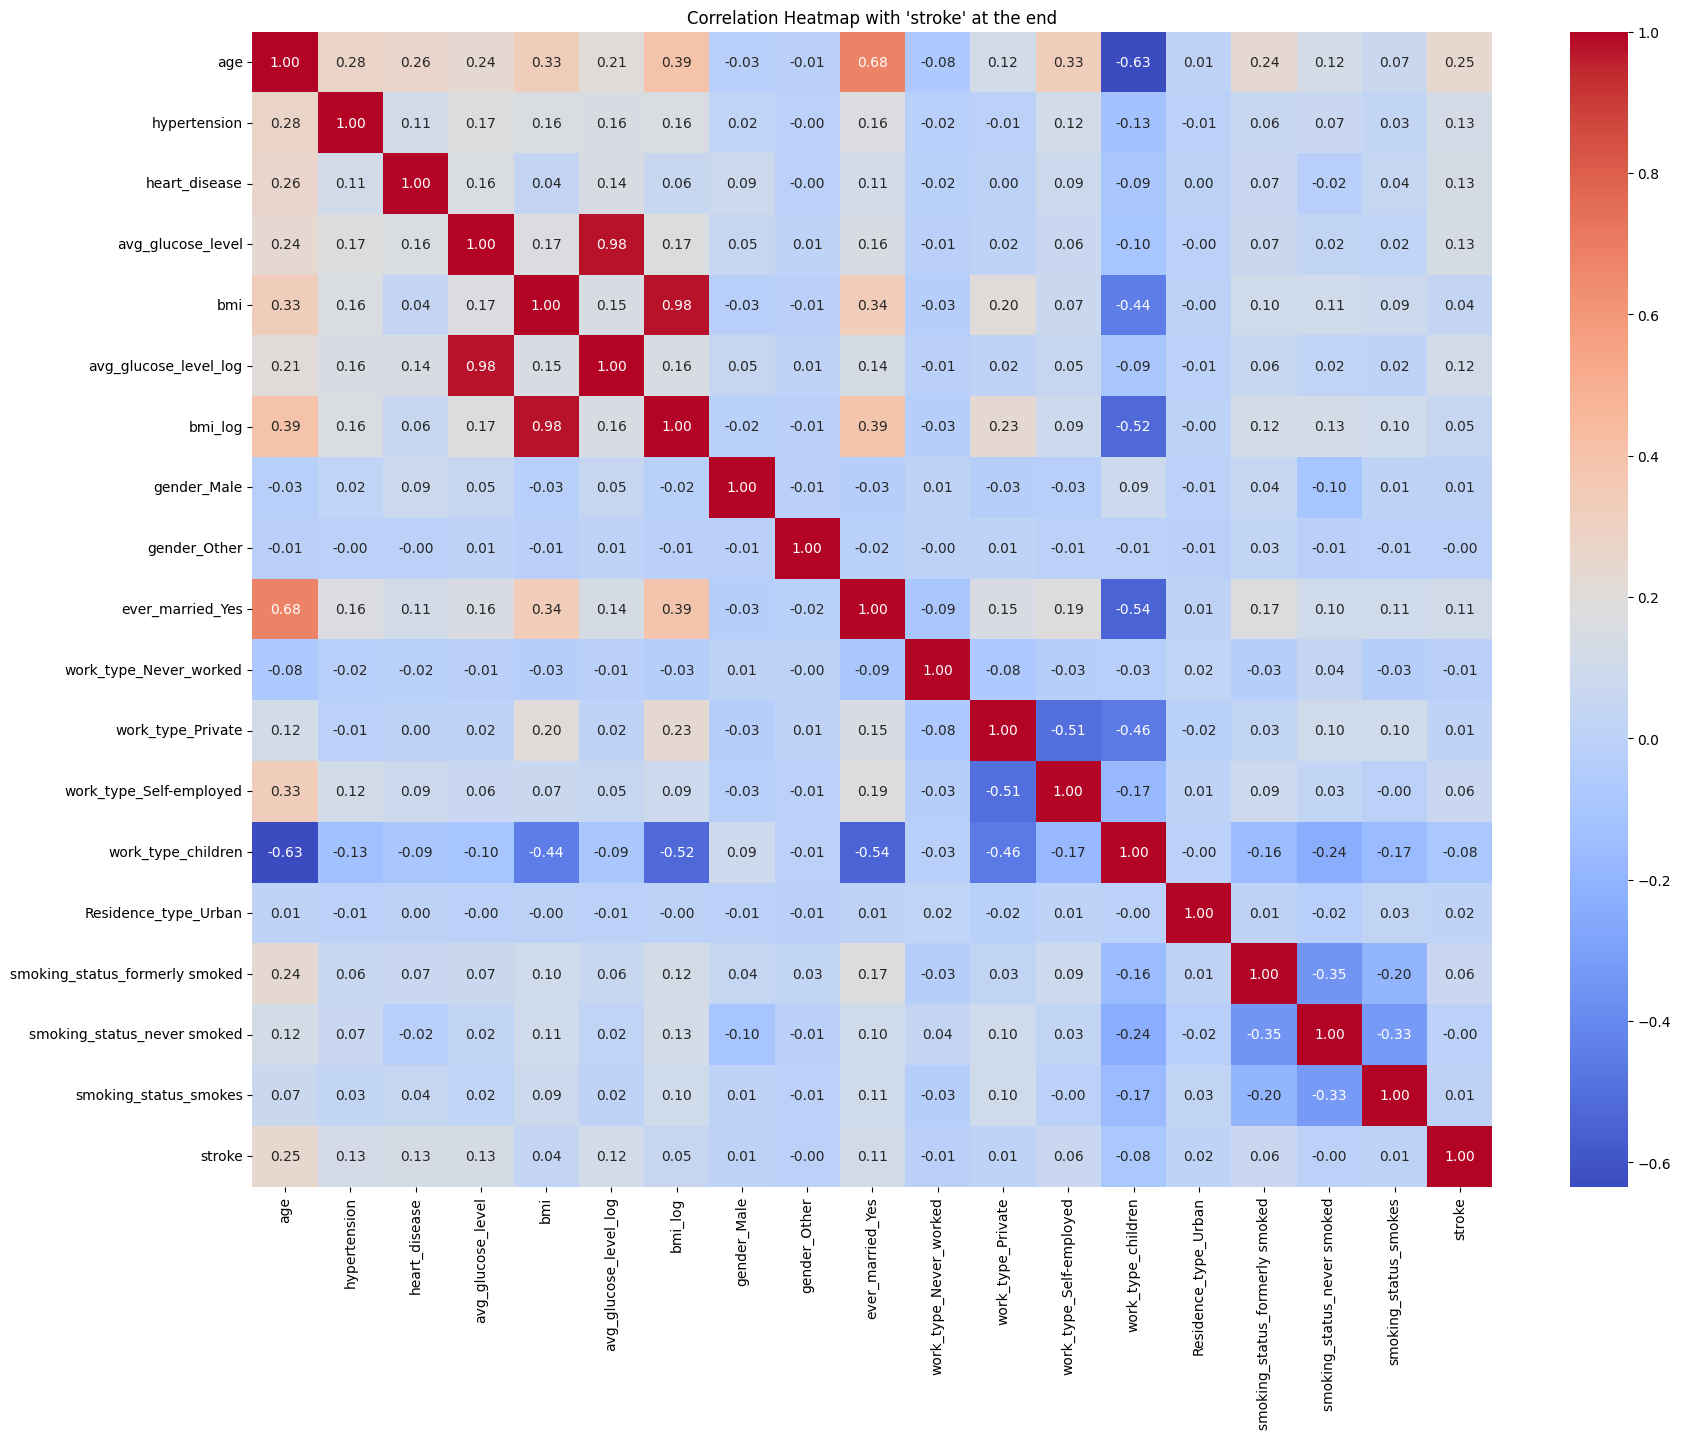

In [ ]:
# Memastikan 'stroke' ada di ujung kanan dataframe
df_dummy_reordered = df_dummy[[c for c in df_dummy if c != 'stroke'] + ['stroke']]

# Menghitung matriks korelasi untuk dataframe yang baru
correlation_matrix_reordered = df_dummy_reordered.corr()

# Membuat heatmap
plt.figure(figsize=(20, 15))  # Ukuran gambar dapat disesuaikan
sns.heatmap(correlation_matrix_reordered, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap with 'stroke' at the end")
plt.show()

Hasil analisa dari heatmap ini adalah:

**'age'** memiliki korelasi positif paling kuat dengan stroke, yang masuk akal karena risiko stroke umumnya meningkat dengan usia.

**'heart_disease'** dan **'hypertension'** juga memiliki korelasi positif yang signifikan, sesuai dengan pengetahuan bahwa penyakit jantung dan hipertensi adalah faktor risiko utama untuk stroke.

**'avg_glucose_level'** menunjukkan korelasi positif yang moderat, mengindikasikan pentingnya kadar glukosa darah.

**'bmi'**, meskipun memiliki korelasi yang lebih rendah, tetap relevan karena berhubungan dengan kondisi kesehatan secara umum.

Variabel lain seperti **status pernikahan, jenis kelamin, dan status merokok** memiliki korelasi yang lebih rendah.

Oleh karena itu, saya memilih fitur age, heart_disease, hypertension, dan avg_glucose_level untuk variabel independen.
Tentunya, stroke sebagai variabel dependen kita karena tujuan kita adalah menyatakan apakah seorang pasien mengidap penyakit stroke atau tidak. 1 berarti stroke, sedangkan 0 sebaliknya.

In [ ]:
# Variabel dependen (target)
y = df_dummy['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
# Variabel independen (fitur)
X = df_dummy[['age', 'heart_disease', 'hypertension', 'avg_glucose_level']]
X.head()

,age,heart_disease,hypertension,avg_glucose_level
0,67.0,1,0,228.69
1,61.0,0,0,202.21
2,80.0,1,0,105.92
3,49.0,0,0,171.23
4,79.0,0,1,174.12


In [ ]:
# Melakukan pembagian dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# KFold untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler hanya pada data training
x_train_scaled = scaler.fit_transform(x_train)

# Menggunakan scaler yang sama untuk mentransform data testing
x_test_scaled = scaler.transform(x_test)


### 3. Implementasi Naive Bayes [30]

Pada tahapan ini, mahasiswa diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**). Teman-teman **boleh** melakukan parameter tuning untuk memaksimalkan model naive bayes. Kemudian, lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Teman-teman dapat menggunakan algoritma cross_validation yang sesuai menurut teman-teman sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, teman-teman dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya. Kemudian jangan lupa mencantumkan hasil evaluasi cross validationnya. Tampilkan juga hasil evaluasi model dan berikan analisis teman-teman terkait hasil evaluasi model. Berikan saran perbaikan yang sesuai menurut pendapat teman-teman jika ternyata model yang diperoleh tidak optimal.

**Catatan**: Ingat bahwa model kita ingin memprediksi apakah pasien mengidap stroke atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model teman-teman dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Lihat distribusi nilai dari setiap feature yang telah teman-teman pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, teman-teman bisa menentukan model apa yang optimal.

Ingat yaa, biasakan menggunakan cell dengan tipe markdown untuk memberikan komentar atau catatan :D

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [ ]:
scores = cross_val_score(modelnb, x_train, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.878426948134537


In [ ]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

**Alasan memilih gaussian naive bayes adalah:**

Memilih Gaussian Naive Bayes untuk dataset ini dikarenakan hasil pilihan fitur yang saya gunakan adalah 'age', 'heart_disease', 'hypertension', 'avg_glucose_level' dengan target 'stroke' dimana semua variabel ini tidak ada yang bersifat kategorik. Gaussian naive bayes ini efektif dalam menangani fitur numerik dan kontinu. Gaussian Naive Bayes mengasumsikan distribusi normal pada data tersebut, yang cocok juga untuk variabel medis seperti age dan level avg_glucose_level. Meskipun kurang ideal untuk fitur biner, Gaussian Naive Bayes seringkali masih memberikan hasil yang memadai. Algoritma ini juga terkenal dengan efisiensinya dalam komputasi dan kecenderungan lebih rendah terhadap overfitting, membuatnya menjadi pilihan yang baik untuk dataset pada kasus ini.

In [ ]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Array data test
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0])

Setelah model ditraining dan ditesting, selanjutnya evaluasi model yang kita buat dengan menilai accuracy, f1-score, recall, dan precision. Tampilkan juga confusion matrix untuk melihat ketepatan prediksi dengan lebih detail.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Lebih lengkap lagi: ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       972
           1       0.19      0.38      0.26        50

    accuracy                           0.89      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.93      0.89      0.91      1022



Confusion Matrix



prediction,0,1
actual,,
0,892,80
1,31,19




Lebih lengkap lagi: 
Accuracy Average: 0.8913894324853229
F1 Macro Average: 0.5982291795788989
F1 Micro Average: 0.8913894324853229
Precision Macro Average: 0.5791665298707552
Precision Micro Average: 0.8913894324853229
Recall Macro Average: 0.6488477366255144
Recall Micro Average: 0.8913894324853229



## C. Kaggle Competition! [10]

In [ ]:
# Mengamil ID
stroke_copy = pd.read_csv("stroke copy.csv")
test_ids = stroke_copy.loc[x_test.index, 'id']

# Tambahkan prediksi ke ID yang sesuai
submission_df = pd.DataFrame({
    'id': test_ids,
    'stroke': y_pred
})

# Simpan sebagai file CSV
submission_file_path = 'Hasil Prediksi Muhammad Nafriel Ramadhan 2106635663.csv'
submission_df.to_csv(submission_file_path, index=False)


Username Kaggle: Nafriel

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Klasifikasi-Lab 5](https://www.kaggle.com/t/9cb1a26cde154db4a3b8205bfdb69d17)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 5 ini, kalian **diwajibkan** untuk mengikuti kompetisi kaggle di atas.

# ----Selesai----